In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


warnings.filterwarnings('ignore')

In [2]:
## Read the data
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Feature Information
- ID : Customer ID


- Age : Customer's age in completed years


- Experience : No. of years of professional experience


- Income : Annual income of the customer ($ 000)


- ZIP Code : Home Address Zip Code


- Family : Family size of the customer


- CCAvg : Avg. Spending on Credit Card per Month ($ 000)


- Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced / Professional


- Mortgage : Value of house mortgage if any. ($000)


- Personal Loan : Did this customer accept the personal loan offered in the last campaign?


- Securities Account : Does the customer have a securities account with the bank?


- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?


- Online : Does the customer use internet banking facilities?


- Credit card : Does the customer use a credit card issued by this Bank?

In [4]:
df['ID'].value_counts()

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

In [5]:
df.drop(['ID', 'ZIP Code',], axis = 1, inplace = True)
# we drop this 2 feature since this model will be used for future predictions, thus we don't need this 2 feature.

In [6]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
df.info()
# there are no null value in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [8]:
#in info we can see there are some categorical feature read as continous variable, 
# we change that feature to categorical variable.
for i in ['Family', 'Education', 'Securities Account', 'CD Account',
          'Online', 'CreditCard']:
    df[i] = df[i].astype('object')

In [9]:
df.describe()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800,0.096000
std,11.463166,11.467954,46.033729,1.747659,101.713802,0.294621
min,23.000000,-3.000000,8.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000,0.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000,1.000000


Some Observation:
- Average age of our customer that participated on this Personal Loan Campaign is 45 years old.
- Average working experience of our customer that participated on this Personal Loan Campaign is 20 years old.
- There are -3 value in experience feature, that doesnt make sense since the lowest value should be 0 if the customer doesnt have working experience.
- Average usage of our customer (who have CC) that participated on this Personal Loan Campaign is 1900 US Dollar/month.
- Average income of our customer that participated on this Personal Loan Campaign is 73000 US Dollar/year.

In [10]:
df.describe(exclude = 'number')

,Family,Education,Securities Account,CD Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000
unique,4,3,2,2,2,2
top,1,1,0,0,1,0
freq,1472,2096,4478,4698,2984,3530


In [11]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [12]:
categorical_columns = df.select_dtypes('object').columns
cat_col = list(categorical_columns)
cat_col

['Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

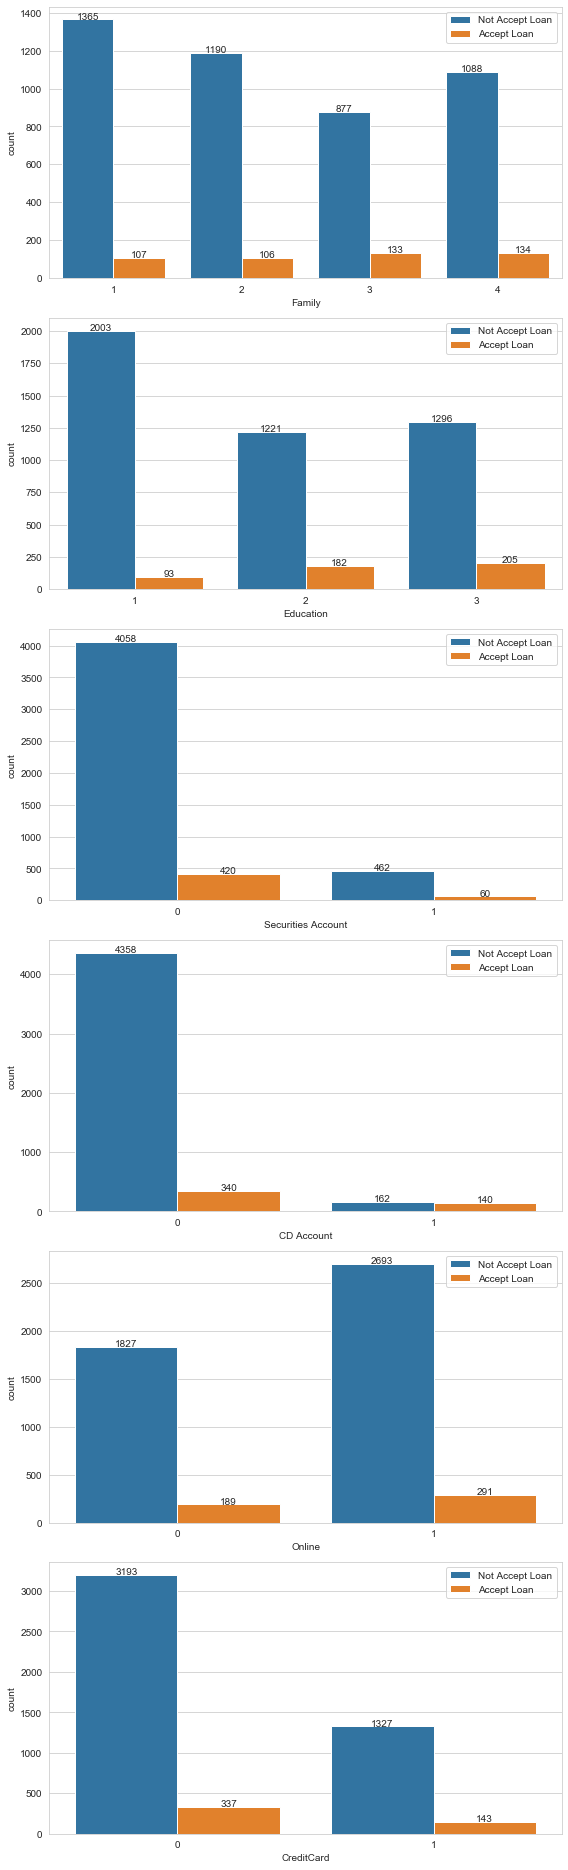

In [13]:
sns.set_style('whitegrid')

plt.figure(figsize = (8,30))
for i in range(len(cat_col)):
    plt.subplot(len(cat_col)+1,1,i+1)
    ax = sns.countplot(x = cat_col[i], hue = 'Personal Loan', data = df)
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points')
    ax.legend(['Not Accept Loan', 'Accept Loan'])
plt.tight_layout()

In [14]:
numerical_columns = df.select_dtypes(exclude='object').columns
num_col = list(numerical_columns)
num_col.remove('Personal Loan')
num_col

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

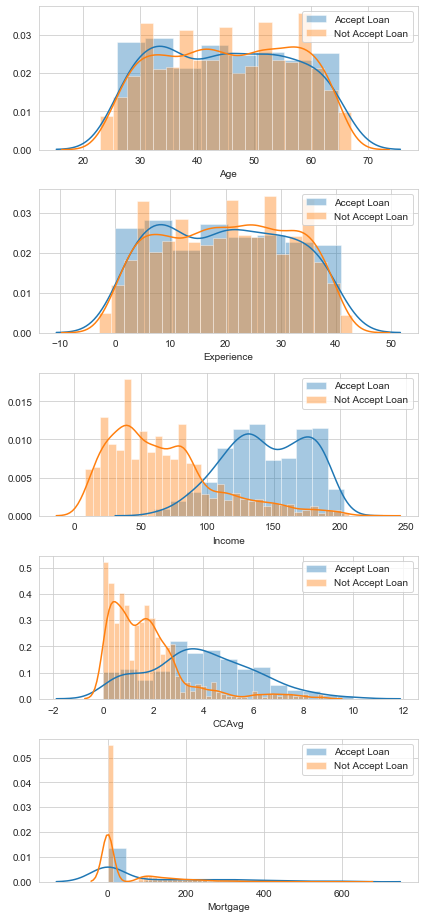

In [15]:
plt.figure(figsize = (6,15))
for i in range(len(num_col)):
    plt.subplot(len(num_col)+1,1,i+1)
    sns.distplot(df[df['Personal Loan'] == 1][num_col[i]], label = 'Accept Loan')
    plt.subplot(len(num_col)+1,1,i+1)
    sns.distplot(df[df['Personal Loan'] == 0][num_col[i]], label = 'Not Accept Loan')
    plt.legend()
plt.tight_layout()

Some Observation:
- from categorical plot customer who have online mobile banking and dont have Credit card are more likely accept personal loan.
- from numerical plot:
    1. Customer who have income > 100.000 US Dollar/year are more likely accept Personal Loan
    2. Customer who have Average CC usage >= 3000 US Dollar are more likely accept Personal Loan

In [16]:
## fix -3 value from experience feature on our data frame
len(df[(df['Experience'] < 0)])

52

## Supervised modelling

In [17]:
data_dummy = pd.get_dummies(df.drop(['Personal Loan'], axis = 1), drop_first = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

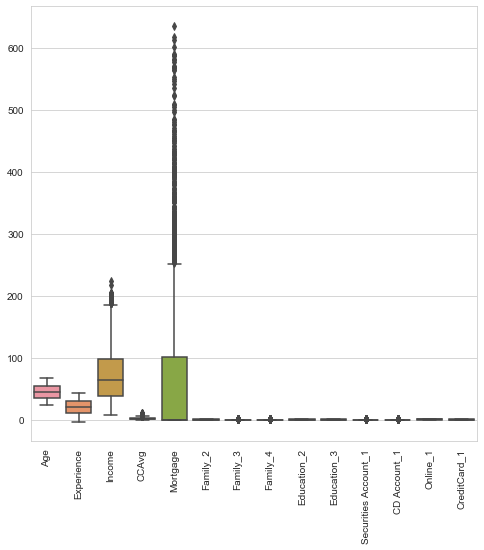

In [18]:
plt.figure(figsize = (8,8))
sns.boxplot(data = data_dummy)
plt.xticks(rotation = 90)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scal = scaler.fit_transform(data_dummy)
dum_col = data_dummy.columns
data_scal = pd.DataFrame(data_scal, columns = dum_col)
data_scal.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,-1.774417,-1.666078,-0.538229,-0.193385,-0.555524,-0.591517,-0.503123,1.758310,-0.624538,-0.654965,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,-0.250611,-0.555524,-0.591517,1.987585,-0.568728,-0.624538,-0.654965,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-0.536736,-0.555524,-0.591517,-0.503123,-0.568728,-0.624538,-0.654965,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,0.436091,-0.555524,-0.591517,-0.503123,-0.568728,1.601185,-0.654965,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,-0.536736,-0.555524,-0.591517,-0.503123,1.758310,1.601185,-0.654965,-0.341423,-0.25354,-1.216618,1.549632


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

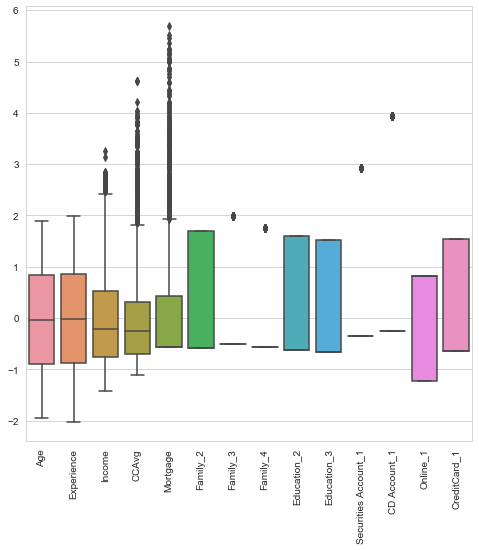

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data_scal)
plt.xticks(rotation = 90)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
target = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(data_scal, target, test_size = 0.3, random_state = 101)

If you remember, we have a case of data imbalance for our Personal Loan feature. We could use SMOTE to try oversampling our data. In this time try use SMOTE to our x_train data but keep it in new variable so we would have 2 different kind of x_train; with and without oversampling.

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_train_ovsampled, y_train_ovsampled = smote.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 2654 to 4959
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3500 non-null   float64
 1   Experience            3500 non-null   float64
 2   Income                3500 non-null   float64
 3   CCAvg                 3500 non-null   float64
 4   Mortgage              3500 non-null   float64
 5   Family_2              3500 non-null   float64
 6   Family_3              3500 non-null   float64
 7   Family_4              3500 non-null   float64
 8   Education_2           3500 non-null   float64
 9   Education_3           3500 non-null   float64
 10  Securities Account_1  3500 non-null   float64
 11  CD Account_1          3500 non-null   float64
 12  Online_1              3500 non-null   float64
 13  CreditCard_1          3500 non-null   float64
dtypes: float64(14)
memory usage: 410.2 KB


In [25]:
X_train_ovsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   6332 non-null   float64
 1   Experience            6332 non-null   float64
 2   Income                6332 non-null   float64
 3   CCAvg                 6332 non-null   float64
 4   Mortgage              6332 non-null   float64
 5   Family_2              6332 non-null   float64
 6   Family_3              6332 non-null   float64
 7   Family_4              6332 non-null   float64
 8   Education_2           6332 non-null   float64
 9   Education_3           6332 non-null   float64
 10  Securities Account_1  6332 non-null   float64
 11  CD Account_1          6332 non-null   float64
 12  Online_1              6332 non-null   float64
 13  CreditCard_1          6332 non-null   float64
dtypes: float64(14)
memory usage: 692.7 KB


## 1. Logistic Regression Model
### 1.1 Original Data

In [26]:
from sklearn.linear_model import LogisticRegression

## LOGISTIC REGRESSION DEFAULT
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
logreg_pred = logreg_model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1354
           1       0.89      0.62      0.73       146

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500



In [29]:
## LOGISTIC REGRESSION MAX_ITER = 1000
logreg_model2 = LogisticRegression(max_iter=1000)
logreg_model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
logreg2_pred = logreg_model2.predict(X_test)

In [31]:
print(classification_report(y_test,logreg2_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1354
           1       0.89      0.62      0.73       146

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 1.2 Oversampled Data

In [32]:
logreg_model2.fit(X_train_ovsampled,y_train_ovsampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print(classification_report(y_test, logreg_model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1354
           1       0.54      0.87      0.66       146

    accuracy                           0.91      1500
   macro avg       0.76      0.89      0.81      1500
weighted avg       0.94      0.91      0.92      1500



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 2. Decision Tree Model
### 2.1 Original Data

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
dtree_pred = dtree.predict(X_test)

In [38]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.87      0.90      0.89       146

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(estimator = dtree,
                      param_grid = {
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
                      }, scoring = 'precision',
                      cv = 5,
                      n_jobs = -1)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [40]:
print(search.best_params_)
print(search.best_score_)

{'criterion': 'gini', 'max_depth': 4}
0.974754767807506


In [41]:
print(classification_report(y_test,search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1354
           1       0.95      0.72      0.82       146

    accuracy                           0.97      1500
   macro avg       0.96      0.86      0.90      1500
weighted avg       0.97      0.97      0.97      1500



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 2.2 Oversampled Data

In [42]:
dtree.fit(X_train_ovsampled,y_train_ovsampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.87      0.90      0.89       146

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [44]:
search.fit(X_train_ovsampled, y_train_ovsampled)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [45]:
print(search.best_params_)
print(search.best_score_)

{'criterion': 'entropy', 'max_depth': 6}
0.9894288808435607


In [46]:
print(classification_report(y_test,search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.92      0.90      0.91       146

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 3. Random Forest Model
### 3.1 Original Data

In [67]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, class_weight='balanced')
randfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
print(classification_report(y_test,randfor.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1354
           1       0.99      0.99      0.99       146

    accuracy                           1.00      1500
   macro avg       0.99      1.00      0.99      1500
weighted avg       1.00      1.00      1.00      1500



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 3.2 Oversampled Data

In [69]:
randfor.fit(X_train_ovsampled, y_train_ovsampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
print(classification_report(y_test,randfor.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.94      0.92      0.93       146

    accuracy                           0.99      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.99      0.99      0.99      1500



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Feature Importance

Text(0.5, 1.0, 'Feature Importances')

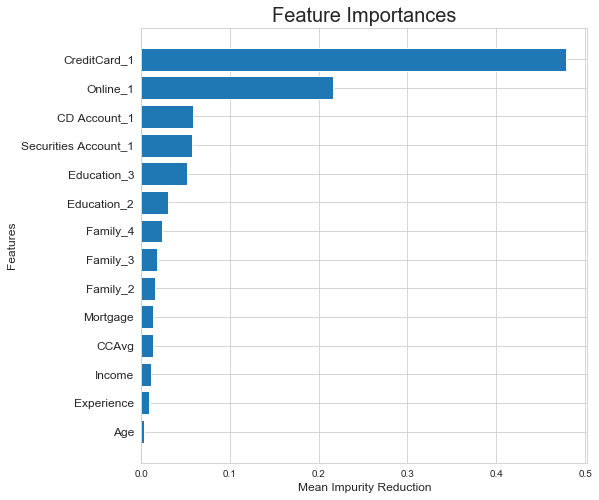

In [51]:
rf_feature =  pd.Series(randfor.feature_importances_, data_scal.columns).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(data_scal.columns, rf_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20)

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Permutation Importance

In [52]:
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

RFmodel = RandomForestClassifier()
RFmodel.fit(X_train,y_train)

perm = PermutationImportance(RFmodel, scoring = 'roc_auc', random_state= 101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.2095 ± 0.0171,Income
0.0440 ± 0.0062,CCAvg
0.0433 ± 0.0050,Education_3
0.0323 ± 0.0063,Education_2
0.0165 ± 0.0011,Family_3
0.0128 ± 0.0023,Family_4
0.0013 ± 0.0009,CD Account_1
0.0006 ± 0.0007,Experience
0.0006 ± 0.0004,Family_2
0.0005 ± 0.0006,Age


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [53]:
### MODEL USE DATA TRAIN BASED ON TOP FEATURE IMPORTANCE & PERMUTATION IMPORTANCE

In [71]:
data_scal.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3',
       'Securities Account_1', 'CD Account_1', 'Online_1', 'CreditCard_1'],
      dtype='object')

In [72]:
xtr, xts, ytr, yts = train_test_split(data_scal[['CreditCard_1','Online_1','Income','Education_3','CCAvg','Education_2']], 
                                      target, test_size = 0.3, random_state = 101)

In [73]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
print(classification_report(y_test,rf.predict(xts)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1354
           1       0.94      0.69      0.80       146

    accuracy                           0.97      1500
   macro avg       0.95      0.84      0.89      1500
weighted avg       0.96      0.97      0.96      1500



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## K-Fold Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(solver='lbfgs'),X_train,y_train,cv = 5).mean())

0.9608571428571429


In [59]:
print(cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv = 5).mean())

0.9828571428571429


In [75]:
print(cross_val_score(RandomForestClassifier(n_estimators=100, class_weight='balanced'),X_train,y_train,cv = 5).mean())

0.9931240130135158


In [61]:
from sklearn.model_selection import KFold
K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 42)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [63]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average = 'macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [76]:
train_errors = []
validation_errors =[]
for train_index, val_index, in kf.split(data_scal, target):
    
    #split data
    X_train, X_val = data_scal.iloc[train_index], data_scal.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #Oversampling
    sm = SMOTE(sampling_strategy='minority')
    X_train, y_train = sm.fit_sample(X_train, y_train)
    
    #instantiate model
    logmodel = RandomForestClassifier(n_estimators=350, min_samples_leaf=10,class_weight='balanced')
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [77]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'], j['roc'],
                  i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC',
                                             'Test ROC AUC', 'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef',
                                             'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
average_mat = pd.DataFrame(average).transpose()
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC',
                                             'Test ROC AUC', 'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef',
                                             'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.989936,0.9880,0.999688,0.999128,0.989936,0.969836,0.979889,0.940442,0.071505,0.085320
2 Iteration,0.991034,0.9900,0.999658,0.998166,0.991034,0.972467,0.982073,0.944991,0.070605,0.080308
3 Iteration,0.991036,0.9880,0.999676,0.997296,0.991036,0.968342,0.982076,0.936896,0.070475,0.097634
4 Iteration,0.991511,0.9820,0.999713,0.996411,0.991511,0.945599,0.983024,0.891796,0.069839,0.097237
5 Iteration,0.991779,0.9800,0.999674,0.997998,0.991779,0.951240,0.983559,0.904063,0.069249,0.095627
6 Iteration,0.992023,0.9740,0.999784,0.986879,0.992023,0.933072,0.984052,0.866191,0.067064,0.102833
7 Iteration,0.991632,0.9860,0.999750,0.995725,0.991632,0.956832,0.983278,0.914300,0.069820,0.090635
8 Iteration,0.990754,0.9880,0.999668,0.999521,0.990754,0.958285,0.981517,0.919815,0.069724,0.088155
9 Iteration,0.991500,0.9700,0.999650,0.995995,0.991500,0.907498,0.983012,0.822856,0.071660,0.091487
10 Iteration,0.992510,0.9760,0.999751,0.987165,0.992510,0.937718,0.985028,0.876212,0.067485,0.103543


train_scores:

[[0.9705     0.963      0.968      0.973      0.9675    ]
 [0.9776     0.9712     0.9768     0.9736     0.9732    ]
 [0.98133333 0.977      0.98066667 0.97466667 0.975     ]
 [0.98       0.97657143 0.982      0.97514286 0.97628571]
 [0.9795     0.97575    0.97825    0.97825    0.97975   ]]


test_scores:

[[0.954 0.953 0.95  0.961 0.948]
 [0.96  0.964 0.964 0.965 0.962]
 [0.959 0.974 0.97  0.973 0.974]
 [0.961 0.972 0.975 0.97  0.974]
 [0.963 0.973 0.971 0.971 0.975]]


train_mean:

[0.9684     0.97448    0.97773333 0.978      0.9783    ]


train_sizes:

[2000 2500 3000 3500 4000]


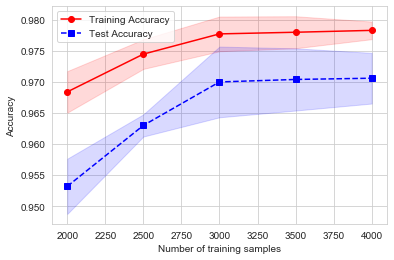

In [78]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=logmodel,
                                                       X=data_scal,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=5)

print('train_scores:\n')
print(train_scores)
print('\n\ntest_scores:\n')
print(test_scores)

train_mean = np.mean(train_scores, axis=1)
print('\n\ntrain_mean:\n')
print(train_mean)
print('\n\ntrain_sizes:\n')
print(train_sizes)

train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')

plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')


plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()